In [1]:
import pandas as pd

In [2]:
filename='/media/user-1131/890c2775-f4a8-4b8b-8409-8af9d518c387/DOT_Traffic_Speeds_NBE.csv'

In [3]:
#Let's scan the csv to see how dates are ordered
df=pd.DataFrame()
chunksize=10**6
for chunk in pd.read_csv(filename, chunksize=chunksize):
    dx=pd.DataFrame(chunk)
    dx=dx['DATA_AS_OF']
    print(dx.head(2))

FileNotFoundError: [Errno 2] No such file or directory: '/media/user-1131/890c2775-f4a8-4b8b-8409-8af9d518c387/DOT_Traffic_Speeds_NBE.csv'

There are over 42 million rows! We'll build our first iteration on a selected portion of this.

In [20]:
#We'll choose 7_000_000 rows from mid-April till end of August and look at them more closely
selected_data=pd.DataFrame()
i=0
chunksize=10**5
for chunk in pd.read_csv(filename, chunksize=chunksize,header=0,skiprows=(range(1,1_500_000))):
    dx=pd.DataFrame(chunk)
    selected_data=pd.concat([selected_data,dx])
    i+=1
    if i>6:
        break

In [6]:
selected_data.head()

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,ENCODED_POLY_LINE_LVLS,OWNER,TRANSCOM_ID,BOROUGH,LINK_NAME
0,338,6.83,748,0,04/05/2019 06:14:04 PM,4616255,"40.81376,-73.93128 40.8127206,-73.9316 40.8121...",_mbxFnufbMnE~@xBP|BOpBeA|A}ArLaQjBgElFiQjHiVvF...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,4616255,Bronx,MDE N RFK Bridge - 142nd St
1,160,0.00,0,-101,04/05/2019 06:14:04 PM,4616266,"40.8562805,-73.87254 40.8521804,-73.871581 40....",wvjxFjf{aMrX_EpKYnJFnNDrTrCdP`CzSdElGb@vHAzG]h...,BBBBBBBBBBBBB,NYC_DOT_LIC,4616266,Bronx,BRP S FORDHAM ROAD - WATSON AVENUE
2,185,3.10,814,0,04/05/2019 06:14:04 PM,4616267,"40.8304204,-73.850811 40.83156,-73.854671 40.8...",cuexFp~vaMcFbWcDtOsC|Nm@pBa@dCk@nDqAfGiAxFgBxI,BBBBBBBBBB,NYC_DOT_LIC,4616267,Bronx,CBE W CASTLE HILL AVENUE - TAYLOR AVENUE
3,426,22.99,300,0,04/05/2019 06:14:04 PM,4616272,"40.7024204,-73.816481 40.700841,-73.815751 40....",culwF~gpaMzHqCjUaKlGgDnl@wXndA_b@bRaH,BBBBBBB,NYC_DOT_LIC,4616272,Queens,VWE S MP4.63 (Exit 6 Jamaica Ave) - MP2.66 (Ex...
4,425,12.42,864,0,04/05/2019 06:14:04 PM,4616276,"40.67445,-73.80181 40.67374,-73.80154 40.67261...",ifgwFhlmaMlCu@`Fo@dJMrSp@`PfDnCd@pCk@|B_D^}D_@...,BBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,4616276,Queens,VWE S MP2.66 (Exit 2 Rockaway Blvd) - Belt Pkw...


In [7]:
selected_data.shape

(7000000, 13)

In [8]:
selected_data.dtypes

ID                          int64
SPEED                     float64
TRAVEL_TIME                 int64
STATUS                      int64
DATA_AS_OF                 object
LINK_ID                     int64
LINK_POINTS                object
ENCODED_POLY_LINE          object
ENCODED_POLY_LINE_LVLS     object
OWNER                      object
TRANSCOM_ID                 int64
BOROUGH                    object
LINK_NAME                  object
dtype: object

In [9]:
#selected_data['speed']=pd.to_numeric(selected_data['speed'])

In [10]:
selected_data['DATA_AS_OF']=pd.to_datetime(selected_data['DATA_AS_OF'])
selected_data.head(2)

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,ENCODED_POLY_LINE_LVLS,OWNER,TRANSCOM_ID,BOROUGH,LINK_NAME
0,338,6.83,748,0,2019-04-05 18:14:04,4616255,"40.81376,-73.93128 40.8127206,-73.9316 40.8121...",_mbxFnufbMnE~@xBP|BOpBeA|A}ArLaQjBgElFiQjHiVvF...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,4616255,Bronx,MDE N RFK Bridge - 142nd St
1,160,0.00,0,-101,2019-04-05 18:14:04,4616266,"40.8562805,-73.87254 40.8521804,-73.871581 40....",wvjxFjf{aMrX_EpKYnJFnNDrTrCdP`CzSdElGb@vHAzG]h...,BBBBBBBBBBBBB,NYC_DOT_LIC,4616266,Bronx,BRP S FORDHAM ROAD - WATSON AVENUE


In [11]:
#date range selected based on trial error. It was one of the longest stretch of data without obvious discontinuities or mis-order.\
#Included a plot to show this in a later cell.
selected_data=selected_data[(selected_data['DATA_AS_OF']>'2019-04-18')&(selected_data['DATA_AS_OF']<'2019-05-22')]

In [12]:
#ordering by date in descending order
selected_data.sort_values(by='DATA_AS_OF', ascending=False, inplace=True)

In [13]:
#Let's check how selected_data looks like
selected_data.head(2)

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,ENCODED_POLY_LINE_LVLS,OWNER,TRANSCOM_ID,BOROUGH,LINK_NAME
1674431,315,49.08,101,0,2019-05-20 19:29:13,4616364,"40.73744001,-73.85188001 40.737015,-73.853730...",_pswFfewaMtApJv@rIh@nDlFbXhH`]bJla@|@`FbHz\fBvG,BBBBBBBBBB,NYC_DOT_LIC,4616364,Queens,LIE W 108TH ST - 84TH ST
1674412,258,34.79,122,0,2019-05-20 19:29:13,4616220,"40.6162405,-74.02612 40.61923,-74.02361 40.623...",oz{vFffybMuQuNmZsVsFyC}D}AeLmDeO_E{JkCaEg@,BBBBBBBBB,NYC_DOT_LIC,4616220,Brooklyn,GOW N 92ND STREET - 7TH AVENUE


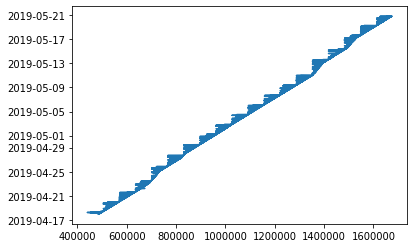

In [14]:
#Let's check if there are discontinuities in the data or if data is out of order
selected_data['DATA_AS_OF'].plot()

In [15]:
#saving selected data to csv
selected_data.to_csv('/media/user-1131/890c2775-f4a8-4b8b-8409-8af9d518c387/selected_data.csv')

In [16]:
#creating multi-index dataframe with 1h rolling average for speed
multiindex_data=selected_data.groupby(by=['LINK_ID']).rolling("1H", on="DATA_AS_OF")[["SPEED"]].mean()
multiindex_data

SPEED
LINK_ID DATA_AS_OF                    
4329472 2019-05-20 19:28:04  13.670000
        2019-05-20 19:23:04  13.670000
        2019-05-20 19:18:04  13.876667
        2019-05-20 19:13:04  14.290000
        2019-05-20 19:08:03  15.160000
...                                ...
4763657 2019-04-18 00:24:05  48.126154
        2019-04-18 00:19:04  48.150000
        2019-04-18 00:14:04  48.269231
        2019-04-18 00:09:06  48.316923
        2019-04-18 00:04:04  48.408333

[1150196 rows x 1 columns]

In [17]:
#saving multi-index to csv
multiindex_data.to_csv('/media/user-1131/890c2775-f4a8-4b8b-8409-8af9d518c387/multiindex_data.csv')

In [21]:
#information on the routes included in the data
route_info=selected_data[['LINK_NAME','LINK_POINTS','LINK_ID']]
route_info.drop_duplicates(inplace=True)

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#Let's save the information on routes. There are 135 unique routes in total.
route_info.to_csv('/media/user-1131/890c2775-f4a8-4b8b-8409-8af9d518c387/route_info.csv')